In [338]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl0
from sklearn import linear_model
from sklearn.grid_search import GridSearchCV
from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score
import sklearn.metrics as sklm

In [339]:
# uniques values in all non-numerical columns of data frame to find out Nan values
def colUnique(df):
    for x in df.columns:
            if df[x].dtype=='object':
                print(df[x].unique(),'\n')
                
# Converting non-numerical values to numerical values
def dummy(df):
    df=pd.get_dummies(df)
    return df               

# normalizing the whole numerical data
def normalize(df,col):
    for x in col:
        mean=df[x].mean()
        std=df[x].std()
        df[x]=(df[x]-mean)/std
    return df
    
# separating target and input variables.
def sepxy(df,col):
    x=df.drop(col,axis=1)
    y=df[col]
    return x,y

# Randomly shuffling the whole dataframe with respect to rows.
def shuffleit(df):
    return df.sample(frac=1)

# Separating and returning dataframe parts according to K-fold configuration.
def separate(df,k,num):
    if (k*num<=len(df)):
        valid=df.iloc[k*(num-1):k*num]
        train=df.drop(range(k*(num-1),k*num),axis=0)
        return train,valid
    else:
        valid=df.iloc[k*(num-1):]
        train=df.drop(range(k*(num-1),len(df)),axis=0)
        return train,valid


In [340]:
def derivative(x,y,beta):
    return -2 * np.dot(x.transpose(),y - np.dot(x,beta))

def lossfunc(x,y,beta):
    tem = y - np.dot(x,beta)
    return  np.dot(tem.transpose(),tem.transpose())

def rmse(x,y,beta):
    tem = y - np.dot(x,beta)
    return  (tem**2).sum()


def sgd(x,y,beta,alpha,imax,epsilon):
    r,c=x.shape
    betaold=beta
    betanew=np.zeros(c)
    for itr in range(imax):
        for re in range(r):            
            betanew=beta-alpha*derivative(x.iloc[re],y.iloc[re],beta)
            beta=betanew
#        print(lossfunc(x,y,betanew)-lossfunc(x,y,betaold))
        betaold=betanew
    return betanew

In [341]:
df=pd.read_csv("C:/anaconda3/Assignments/5th/winequality-red.csv",sep=';')
df.head()
ytopre='quality'

In [342]:
df=df.dropna(axis=0)
df=dummy(df)
df=normalize(df,df.columns)
df=shuffleit(df)
train,test=separate(df,int(len(df)*0.2),1)

In [343]:
xtrain,ytrain=sepxy(train,ytopre)
xtest,ytest=sepxy(test,ytopre)

In [344]:
r,c=xtrain.shape
beta=np.zeros(c)


In [406]:
# rmseTrain,rmseTest=model(xtrain,xtest,ytrain,ytest,Epochs max,StepSize0,StepSizeUpdate,Regularizaiton Type,Lambda)
def model(xtrain,xtest,ytrain,ytest,itr,StepSize0,SSChange,regularizationType,lamb):
    rmseTrain=np.zeros(itr)
    rmseTest=np.zeros(itr)
    for i in range(itr):
        clf=skl.linear_model.SGDRegressor(penalty=regularizationType,
                                          n_iter=i+1,alpha=lamb,eta0=StepSize0,learning_rate=SSChange,shuffle=False)   
        clf.fit(xtrain,ytrain)
        rmseTrain[i]=skl.metrics.mean_squared_error(np.dot(xtrain,clf.coef_),ytrain)
        rmseTest[i]=skl.metrics.mean_squared_error(np.dot(xtest,clf.coef_),ytest)
    return rmseTrain,rmseTest

In [448]:
# rmseTrain,rmseTest=model(xtrain,xtest,ytrain,ytest,Epochs max,StepSize0,StepSizeUpdate,Regularizaiton Type,Lambda)
itr=10
lamb=0
StepSize0=0.0005
SSChange='constant'
regularizationType=None

rmseTrain1,rmseTest1=model(xtrain,xtest,ytrain,ytest,itr,StepSize0,SSChange,regularizationType,lamb)

lamb=0.01
regularizationType='l2'

rmseTrain2,rmseTest2=model(xtrain,xtest,ytrain,ytest,itr,StepSize0,SSChange,regularizationType,lamb)

lamb=0.01
regularizationType='l1'

rmseTrain3,rmseTest3=model(xtrain,xtest,ytrain,ytest,itr,StepSize0,SSChange,regularizationType,lamb)



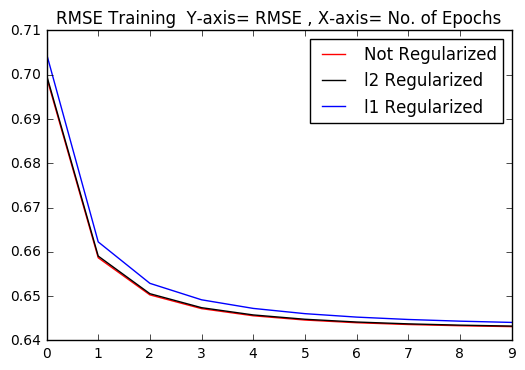

In [449]:
plt.plot(rmseTrain1,color='red',label='Not Regularized')
plt.plot(rmseTrain2,color='black',label='l2 Regularized')
plt.plot(rmseTrain3,color='blue',label='l1 Regularized')
plt.title("RMSE Training  Y-axis= RMSE , X-axis= No. of Epochs")
plt.legend(loc='upper right')
plt.show()


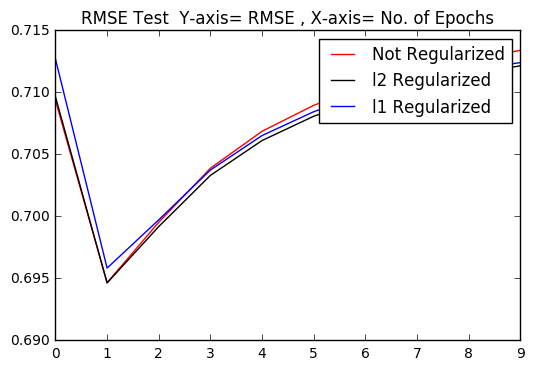

In [450]:
plt.plot(rmseTest1,color='red',label='Not Regularized')
plt.plot(rmseTest2,color='black',label='l2 Regularized')
plt.plot(rmseTest3,color='blue',label='l1 Regularized')
plt.title("RMSE Test  Y-axis= RMSE , X-axis= No. of Epochs")
plt.legend(loc='upper right')
plt.show()


In [416]:
# rmseTrain,rmseTest=model(xtrain,xtest,ytrain,ytest,Epochs max,StepSize0,StepSizeUpdate,Regularizaiton Type,Lambda)
itr=10
lamb=[10,0,0.1]
StepSize0=[1,0.1,0.01]
SSChange='constant'
regularizationType=[None,'l2','l1']
rmseTrain=np.zeros([len(lamb)*len(StepSize0)*len(regularizationType),itr])
rmseTest=np.zeros([len(lamb)*len(StepSize0)*len(regularizationType),itr])
counter=0

for c in range(len(regularizationType)):
    for a in range(len(lamb)):
        for b in range(len(StepSize0)):
            rmseTrain[counter],rmseTest[counter]=model(xtrain,xtest,ytrain,ytest,itr,StepSize0[b],SSChange,
                                                           regularizationType[c],lamb[a])

            counter=counter+1


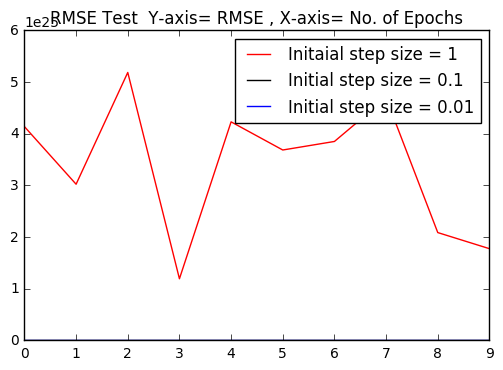

In [417]:
plt.plot(rmseTest[0],color='red',label='Initaial step size = 1')
plt.plot(rmseTest[1],color='black',label='Initial step size = 0.1')
plt.plot(rmseTest[2],color='blue',label='Initial step size = 0.01')
plt.title("RMSE Test  Y-axis= RMSE , X-axis= No. of Epochs")
plt.legend(loc='upper right')
plt.show()


RMSE Test          0.733203089644
Mean RMSE train of kfolds   -0.657237318124
RMSE train of whole data   0.648664490406
{'eta0': 0.01, 'alpha': 1}
shit head {'eta0': 0.01, 'alpha': 1}
RMSE Test          0.71057287835
Mean RMSE train of kfolds   -0.651555322781
RMSE train of whole data   0.648860807013
{'eta0': 0.01, 'alpha': 0.1}
RMSE Test          0.714190492372
Mean RMSE train of kfolds   -0.652582642483
RMSE train of whole data   0.646606605742
{'eta0': 0.01, 'alpha': 0.01}


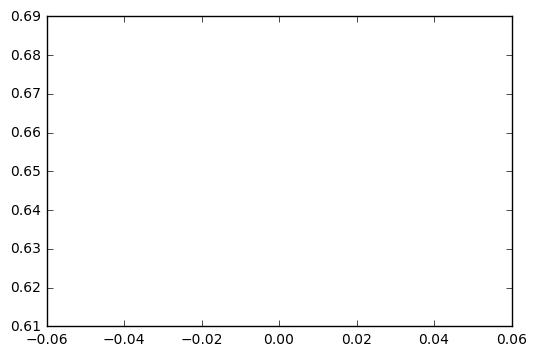

0.646606605742


In [457]:
#code for Grid Search CV. Simple squared error no Regularization
lamb=[1,0.1,0.01]
StepSize0=[1,0.1,0.01]
regularizationType='none'
SSChange='constant'


linearGS=0
clf=skl.linear_model.SGDRegressor(learning_rate=SSChange,penalty=regularizationType,shuffle=False)
paramgrid={'eta0':StepSize0,'alpha':lamb}
linearGS=GridSearchCV(estimator=clf,param_grid=paramgrid,n_jobs=1,cv=3,scoring='mean_squared_error')
linearGS.fit(xtrain,ytrain)
print("RMSE Test         ",skl.metrics.mean_squared_error(np.dot(xtest,linearGS.best_estimator_.coef_),ytest))
print("Mean RMSE train of kfolds  ",linearGS.best_score_)
print("RMSE train of whole data  ",sklm.mean_squared_error(np.dot(xtrain,linearGS.best_estimator_.coef_),ytrain))
print(linearGS.best_params_)
plt.plot(sklm.mean_squared_error(np.dot(xtrain,linearGS.best_estimator_.coef_),ytrain),color='red',label='Initaial step size = 1')

final1=linearGS
print("shit head",final1.best_params_)
regularizationType='l2'
linearGS=0
clf=skl.linear_model.SGDRegressor(learning_rate=SSChange,penalty=regularizationType,shuffle=False)
paramgrid={'eta0':StepSize0,'alpha':lamb}
linearGS=GridSearchCV(estimator=clf,param_grid=paramgrid,n_jobs=1,cv=3,scoring='mean_squared_error')
linearGS.fit(xtrain,ytrain)
print("RMSE Test         ",skl.metrics.mean_squared_error(np.dot(xtest,linearGS.best_estimator_.coef_),ytest))
print("Mean RMSE train of kfolds  ",linearGS.best_score_)
print("RMSE train of whole data  ",sklm.mean_squared_error(np.dot(xtrain,linearGS.best_estimator_.coef_),ytrain))
print(linearGS.best_params_)
#plt.plot(sklm.mean_squared_error(np.dot(xtrain,linearGS.best_estimator_.coef_),ytrain),color='red',label='Initaial step size = 1')

final2=linearGS


regularizationType='l1'
linearGS=0
clf=skl.linear_model.SGDRegressor(learning_rate=SSChange,penalty=regularizationType,shuffle=False)
paramgrid={'eta0':StepSize0,'alpha':lamb}
linearGS=GridSearchCV(estimator=clf,param_grid=paramgrid,n_jobs=1,cv=3,scoring='mean_squared_error')
linearGS.fit(xtrain,ytrain)
print("RMSE Test         ",skl.metrics.mean_squared_error(np.dot(xtest,linearGS.best_estimator_.coef_),ytest))
print("Mean RMSE train of kfolds  ",linearGS.best_score_)
print("RMSE train of whole data  ",sklm.mean_squared_error(np.dot(xtrain,linearGS.best_estimator_.coef_),ytrain))
print(linearGS.best_params_)
#plt.plot(sklm.mean_squared_error(np.dot(xtrain,linearGS.best_estimator_.coef_),ytrain),color='red',label='Initaial step size = 1')
plt.show()
print(sklm.mean_squared_error(np.dot(xtrain,linearGS.best_estimator_.coef_),ytrain))

final3=linearGS


In [485]:
lambv=final1.best_params_['eta0']
StepSize0v=final1.best_params_['alpha']
regularizationTypev=None
clfv=skl.linear_model.SGDRegressor(learning_rate=SSChange,penalty=regularizationTypev,alpha=StepSize0v,eta0=lambv,shuffle=False)
CrossValError1=cross_val_score(clfv,xtrain,y=ytrain,n_jobs=1,cv=3,scoring='mean_squared_error')
print("Ordinary Least Squares 3-folds RMSE Train = ",abs(CrossValError1))
print("Ordinary Least Squares 3-folds RMSE Train mean = ",abs(CrossValError1.mean()))

lambv=final2.best_params_['eta0']
StepSize0v=final2.best_params_['alpha']
regularizationTypev='l2'
clfv=skl.linear_model.SGDRegressor(learning_rate=SSChange,penalty=regularizationTypev,alpha=StepSize0v,eta0=lambv,shuffle=False)
CrossValError2=cross_val_score(clfv,xtrain,y=ytrain,n_jobs=1,cv=3,scoring='mean_squared_error')
print("Ridge Regression 3-folds RMSE Train = ",abs(CrossValError2))
print("Ridge Regression 3-folds RMSE Train mean = ",abs(CrossValError2.mean()))

lambv=final3.best_params_['eta0']
StepSize0v=final3.best_params_['alpha']
regularizationTypev='l1'
clfv=skl.linear_model.SGDRegressor(learning_rate=SSChange,penalty=regularizationTypev,alpha=StepSize0v,eta0=lambv,shuffle=False)
CrossValError3=cross_val_score(clfv,xtrain,y=ytrain,n_jobs=1,cv=3,scoring='mean_squared_error')
print("LASSO 3-folds RMSE Train = ",abs(CrossValError3))
print("LASSO 3-folds RMSE Train mean = ",abs(CrossValError3.mean()))



Ordinary Least Squares 3-folds RMSE Train =  [ 0.690827    0.64569828  0.63513492]
Ordinary Least Squares 3-folds RMSE Train mean =  0.657220064103
Ridge Regression 3-folds RMSE Train =  [ 0.67300761  0.64366772  0.6379588 ]
Ridge Regression 3-folds RMSE Train mean =  0.65154470879
LASSO 3-folds RMSE Train =  [ 0.67377594  0.64504159  0.63889836]
LASSO 3-folds RMSE Train mean =  0.65257195998


In [1]:
s = 10
nrow=1
ncol=1  # fontsize

fig, axes = plt.subplots(nrows=nrow, ncols=ncol)
axes.boxplot([CrossValError1,CrossValError2,CrossValError3])
axes.set_title('Non-Regulized Linear         Ridge               LASSO', fontsize=fs)
#axes[0].boxplot(CrossValError2)
#axes[0].set_title('Ridge Regression', fontsize=fs)
#axes[0].boxplot(CrossValError3)
#axes[0].set_title('LASSO', fontsize=fs)
plt.show()

NameError: name 'plt' is not defined